In [89]:
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline

In [90]:
df = sns.load_dataset('iris')

In [91]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [92]:
df['species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [93]:
# labelling w/o using label encoder
df['species'] = df['species'].map({'setosa': 0, 'versicolor':1, 'virginica':2})

In [94]:
# Depend and independent features
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [95]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=45)

In [96]:
X_train

,sepal_length,sepal_width,petal_length,petal_width
21,5.1,3.7,1.5,0.4
111,6.4,2.7,5.3,1.9
62,6.0,2.2,4.0,1.0
117,7.7,3.8,6.7,2.2
37,4.9,3.6,1.4,0.1
...,...,...,...,...
68,6.2,2.2,4.5,1.5
95,5.7,3.0,4.2,1.2
32,5.2,4.1,1.5,0.1
124,6.7,3.3,5.7,2.1


In [97]:
y_train


21     0
111    2
62     1
117    2
37     0
      ..
68     1
95     1
32     0
124    2
131    2
Name: species, Length: 105, dtype: int64

In [98]:
from sklearn.linear_model import LogisticRegression 
lr = LogisticRegression()


In [99]:
from sklearn.model_selection import GridSearchCV
parameter = {'C': [0.5, 1, 2, 3, 5, 6, 7, 9, 10, 30, 45], 'penalty': ['l1', 'l2', 'elasticnet']}
log_regressor = GridSearchCV(lr, parameter, scoring = 'accuracy', cv=5)

In [100]:
log_regressor.fit(X, y)

C:\Users\PRITI CHAUDHARY\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\PRITI CHAUDHARY\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-

C:\Users\PRITI CHAUDHARY\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\PRITI CHAUDHARY\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-

C:\Users\PRITI CHAUDHARY\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\PRITI CHAUDHARY\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.5, 1, 2, 3, 5, 6, 7, 9, 10, 30, 45],
                         'penalty': ['l1', 'l2', 'elasticnet']},
             scoring='accuracy')

In [101]:
print(log_regressor.best_params_)

{'C': 10, 'penalty': 'l2'}


In [102]:
print(log_regressor.best_score_)

0.9800000000000001


In [103]:
log_pred = log_regressor.predict(X_test)

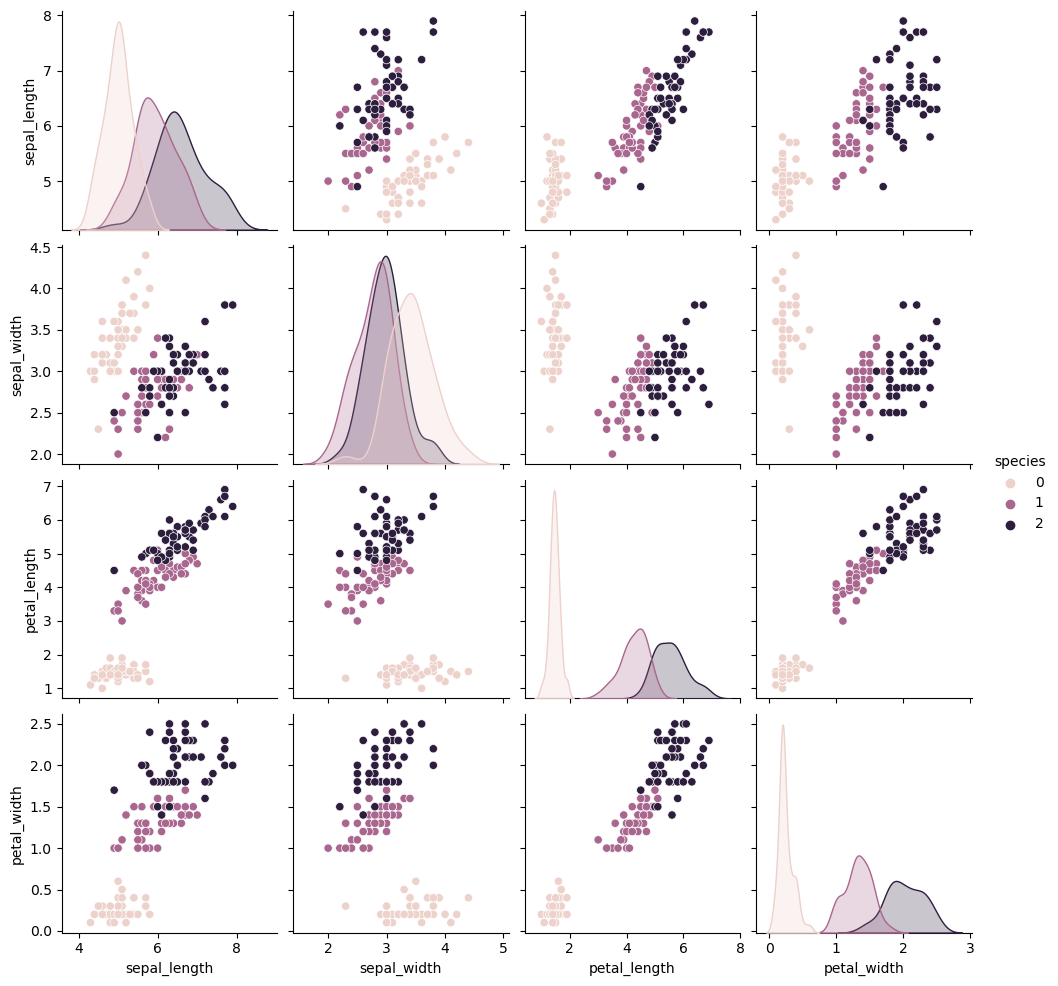

In [108]:
sns.pairplot(df, hue='species')

In [109]:
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score

In [110]:
confusion_matrix(y_test, log_pred)

array([[17,  0,  0],
       [ 0, 13,  0],
       [ 0,  1, 14]], dtype=int64)

In [107]:
f1_score(y_test, log_pred, average='micro')

0.9777777777777777